<a href="https://colab.research.google.com/github/thai94/d2l/blob/main/3.linear-neural-networks/3_2_linear_regression_implementation_from_scratch_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import random
import torch

In [8]:
def synthetic_data(w, b, num_examples):

  X = torch.normal(0, 1, (num_examples, len(w)))
  y = torch.matmul(X, w) + b
  y += torch.normal(0, 0.01, y.shape)
  return X, y.reshape((-1, 1))

In [9]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [10]:
features[0:10]

tensor([[ 0.0394, -0.2353],
        [ 1.0252,  1.7181],
        [ 0.3337,  1.7631],
        [-0.1748,  0.2778],
        [-1.2791,  1.1288],
        [ 1.6410,  0.6225],
        [-0.8783, -1.1584],
        [ 0.7344,  1.9089],
        [ 0.5548,  0.9170],
        [-0.5785,  0.6409]])

In [12]:
labels[0:10]

tensor([[ 5.0908],
        [ 0.4279],
        [-1.1267],
        [ 2.8856],
        [-2.1946],
        [ 5.3683],
        [ 6.3813],
        [-0.8293],
        [ 2.1877],
        [ 0.8759]])

In [13]:
print('features: ', features[0], '\n label: ', labels[0])

features:  tensor([ 0.0394, -0.2353]) 
 label:  tensor([5.0908])


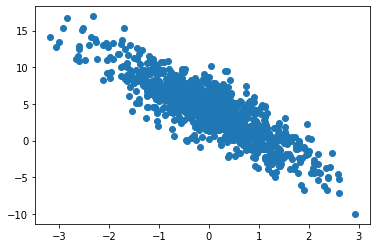

In [16]:
import matplotlib.pyplot as plt

plt.scatter(features[:, 1], labels[:, 0])

In [17]:
def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  random.shuffle(indices)
  for i in range(0, num_examples, batch_size):
    batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
    yield features[batch_indices], labels[batch_indices]

In [18]:
batch_size = 10

for (X,y) in data_iter(batch_size, features, labels):
  print(X, '\n', y)

tensor([[ 1.0995, -0.3451],
        [ 1.0383, -1.2434],
        [ 1.4041,  0.1065],
        [ 0.1140,  0.6641],
        [ 1.8986,  0.4399],
        [ 0.4286, -1.6460],
        [-1.1004, -1.0678],
        [ 1.4146, -0.3500],
        [ 0.5411,  0.4811],
        [ 0.7303,  0.5464]]) 
 tensor([[ 7.5812],
        [10.5271],
        [ 6.6468],
        [ 2.1655],
        [ 6.4998],
        [10.6333],
        [ 5.6436],
        [ 8.1965],
        [ 3.6526],
        [ 3.8073]])
tensor([[-1.7276, -1.1306],
        [ 0.1586,  0.7807],
        [ 0.0292, -0.8029],
        [-0.0124,  0.9795],
        [ 0.3185, -0.4957],
        [-0.3065,  0.5636],
        [ 1.4740,  2.0427],
        [ 1.0455, -2.0629],
        [ 0.1926,  0.3620],
        [ 1.8981, -0.5342]]) 
 tensor([[ 4.5796],
        [ 1.8633],
        [ 6.9839],
        [ 0.8362],
        [ 6.5254],
        [ 1.6569],
        [ 0.1991],
        [13.3153],
        [ 3.3571],
        [ 9.8094]])
tensor([[ 0.4946, -0.2397],
        [ 1.2331,  1.386

In [19]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [24]:
def linreg(X, w, b):
  return torch.matmul(X, w) + b

In [21]:
def squared_loss(y_hat, y):
  return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [22]:
def sgd(params, lr, batch_size):
  with torch.no_grad():
    for param in params:
      param -= lr * param.grad / batch_size
      param.grad.zero_()

In [27]:
lr = 0.03
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
  for X,y in data_iter(batch_size, features, labels):
    l = loss(net(X, w, b), y)
    l.sum().backward()
    sgd([w, b], lr, batch_size)
  with torch.no_grad():
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000050
epoch 2, loss 0.000050
epoch 3, loss 0.000050
epoch 4, loss 0.000050
epoch 5, loss 0.000050
epoch 6, loss 0.000050
epoch 7, loss 0.000050
epoch 8, loss 0.000050
epoch 9, loss 0.000050
epoch 10, loss 0.000051


In [30]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0004, -0.0006], grad_fn=<SubBackward0>)
error in estimating b: tensor([-0.0002], grad_fn=<RsubBackward1>)
